In [3]:
import sklearn as sk
import matplotlib as plt
import pandas as pd


# Use read_csv() to load the CSV file into a pandas DataFrame
data = pd.read_csv('Data/full_data.csv',low_memory=False)

ann2_variables = [
    'strike',
    'stock',
    'tau',
    'sigma',
    'price',
    'call',
    'dividendRate',
    'dividendYield',
    'fiveYearAvgDividendYield',
]


ann2_data = data[ann2_variables]

In [4]:
ann2_call_data = ann2_data[ann2_data.call == 1]
ann2_put_data = ann2_data[ann2_data.call == 0]

ann2_call_data.drop('call', axis = 1, inplace = True)
ann2_put_data.drop('call', axis = 1, inplace = True)

C:\Users\domen\AppData\Local\Temp\ipykernel_2064\3590972737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ann2_call_data.drop('call', axis = 1, inplace = True)
C:\Users\domen\AppData\Local\Temp\ipykernel_2064\3590972737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ann2_put_data.drop('call', axis = 1, inplace = True)


In [57]:
ann2_call_data

,strike,stock,tau,sigma,price,dividendRate,dividendYield,fiveYearAvgDividendYield
0,210.0,407.48,0.055556,0.223118,199.70,3.0,0.0071,0.95
1,220.0,417.32,0.003968,0.223118,200.32,3.0,0.0071,0.95
2,230.0,417.32,0.003968,0.223118,189.90,3.0,0.0071,0.95
3,235.0,404.90,0.126984,0.223118,174.91,3.0,0.0071,0.95
4,250.0,417.32,0.003968,0.223118,170.23,3.0,0.0071,0.95
...,...,...,...,...,...,...,...,...
73147,0.5,0.38,0.079365,1.978739,0.05,0.0,0.0000,0.00
73148,1.0,7.10,0.369048,1.064334,0.10,0.0,0.0000,0.00
73149,2.0,7.10,0.365079,1.064334,0.05,0.0,0.0000,0.00
73150,3.0,12.50,0.519841,1.064334,0.15,0.0,0.0000,0.00


In [58]:
ann2_put_data

,strike,stock,tau,sigma,price,dividendRate,dividendYield,fiveYearAvgDividendYield
65,210.0,406.22,0.031746,0.223118,0.01,3.0,0.0071,0.95
66,220.0,404.52,0.019841,0.223118,0.02,3.0,0.0071,0.95
67,235.0,405.57,0.095238,0.223118,0.02,3.0,0.0071,0.95
68,250.0,404.06,0.091270,0.223118,0.02,3.0,0.0071,0.95
69,255.0,414.92,0.047619,0.223118,0.02,3.0,0.0071,0.95
...,...,...,...,...,...,...,...,...
73144,4.0,3.48,0.642857,2.166917,2.15,0.0,0.0000,0.00
73145,4.5,1.06,0.083333,2.166917,3.40,0.0,0.0000,0.00
73146,5.5,2.36,0.436508,2.166917,3.43,0.0,0.0000,0.00
73152,1.0,11.65,0.464286,1.064334,0.25,0.0,0.0000,0.00


In [77]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import keras


# Separate features and target
X = ann2_call_data[[
        'strike',
        'stock', 
        'tau',
        'sigma',
        'dividendRate',
        'dividendYield',
        'fiveYearAvgDividendYield',
          ]]
y = ann2_call_data['price']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)



In [78]:
ANN2_call = Sequential()
ANN2_call.add(Dense(15,input_dim = 7, activation = 'relu'))
ANN2_call.add(Dense(15, activation = 'relu'))
ANN2_call.add(Dense(15, activation = 'relu'))
ANN2_call.add(Dense(15, activation = 'relu'))
ANN2_call.add(Dense(15, activation = 'relu'))
ANN2_call.add(Dense(15, activation = 'relu'))
ANN2_call.add(Dense(1))

ANN2_call.compile(loss = 'mean_squared_error',optimizer = 'Adam')
ANN2_call.fit(X_train,y_train,epochs = 150, batch_size = 16)

Epoch 1/150
1945/1945 [==============================] - 7s 3ms/step - loss: 1266.1523
Epoch 2/150
1945/1945 [==============================] - 5s 3ms/step - loss: 684.9989
Epoch 3/150
1945/1945 [==============================] - 5s 2ms/step - loss: 730.6456
Epoch 4/150
1945/1945 [==============================] - 4s 2ms/step - loss: 704.6823
Epoch 5/150
1945/1945 [==============================] - 4s 2ms/step - loss: 735.6767
Epoch 6/150
1945/1945 [==============================] - 4s 2ms/step - loss: 687.0060
Epoch 7/150
1945/1945 [==============================] - 4s 2ms/step - loss: 696.8115
Epoch 8/150
1945/1945 [==============================] - 5s 2ms/step - loss: 723.5564
Epoch 9/150
1945/1945 [==============================] - 5s 2ms/step - loss: 677.0456
Epoch 10/150
1945/1945 [==============================] - 6s 3ms/step - loss: 676.5975
Epoch 11/150
1945/1945 [==============================] - 5s 3ms/step - loss: 672.4601
Epoch 12/150
1945/1945 [===========================

In [73]:
del ANN2_call

In [75]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import keras


# Separate features and target
X = ann2_put_data[[
        'strike',
        'stock', 
        'tau',
        'sigma',
        'dividendRate',
        'dividendYield',
        'fiveYearAvgDividendYield',
          ]]
y = ann2_put_data['price']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [76]:
ANN2_put = Sequential()
ANN2_put.add(Dense(15,input_dim = 7, activation = 'relu'))
ANN2_put.add(Dense(15, activation = 'relu'))
ANN2_put.add(Dense(15, activation = 'relu'))
ANN2_put.add(Dense(15, activation = 'relu'))
ANN2_put.add(Dense(15, activation = 'relu'))
ANN2_put.add(Dense(15, activation = 'relu'))
ANN2_put.add(Dense(1))

ANN2_put.compile(loss = 'mean_squared_error',optimizer = 'Adam')
ANN2_put.fit(X_train,y_train,epochs = 150, batch_size = 16)


Epoch 1/150
1714/1714 [==============================] - 6s 3ms/step - loss: 579.2531
Epoch 2/150
1714/1714 [==============================] - 5s 3ms/step - loss: 399.5002
Epoch 3/150
1714/1714 [==============================] - 5s 3ms/step - loss: 326.0551
Epoch 4/150
1714/1714 [==============================] - 5s 3ms/step - loss: 305.7791
Epoch 5/150
1714/1714 [==============================] - 5s 3ms/step - loss: 314.7613
Epoch 6/150
1714/1714 [==============================] - 5s 3ms/step - loss: 286.5433
Epoch 7/150
1714/1714 [==============================] - 4s 3ms/step - loss: 302.0457
Epoch 8/150
1714/1714 [==============================] - 4s 3ms/step - loss: 279.5893
Epoch 9/150
1714/1714 [==============================] - 4s 2ms/step - loss: 263.0671
Epoch 10/150
1714/1714 [==============================] - 6s 3ms/step - loss: 266.8351
Epoch 11/150
1714/1714 [==============================] - 6s 4ms/step - loss: 289.3692
Epoch 12/150
1714/1714 [============================

In [79]:
ANN2_call.save('models\\ann2\ANN2_call.keras')
ANN2_put.save('models\\ann2\ANN2_put.keras')

#### PERFORMANCE FOR CALL MODEL

In [25]:
from keras.models import load_model

# Load the model
ANN2_call = load_model('models\\ann2\\ANN2_call.keras')

In [23]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split


# Separate features and target
X = ann2_call_data[[
        'strike',
        'stock', 
        'tau',
        'sigma',
        'dividendRate',
        'dividendYield',
        'fiveYearAvgDividendYield',
          ]]
y = ann2_call_data['price']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [7]:
X_test

,strike,stock,tau,sigma,dividendRate,dividendYield,fiveYearAvgDividendYield
10271,307.5,321.06,0.003968,0.420430,0.00,0.0000,0.00
36007,90.0,64.41,0.023810,0.711829,0.00,0.0000,0.00
63829,5.0,10.56,0.083333,0.633917,0.00,0.0000,0.00
24995,185.0,108.06,0.146825,0.261064,1.44,0.0123,0.92
69910,10.0,7.16,0.142857,0.333159,0.00,0.0000,0.00
...,...,...,...,...,...,...,...
13355,1760.0,1000.68,0.007937,0.960084,0.00,0.0000,0.00
35324,8.0,32.72,0.138889,0.791322,0.00,0.0000,0.00
39515,121.0,111.91,0.003968,0.513559,0.00,0.0000,0.00
17752,84.0,77.02,0.003968,0.254547,0.00,0.0000,0.00


In [8]:
X_test['ann2'] = ANN2_call.predict(X_test)
X_test

244/244 [==============================] - 1s 2ms/step


,strike,stock,tau,sigma,dividendRate,dividendYield,fiveYearAvgDividendYield,ann2
10271,307.5,321.06,0.003968,0.420430,0.00,0.0000,0.00,24.093925
36007,90.0,64.41,0.023810,0.711829,0.00,0.0000,0.00,0.734800
63829,5.0,10.56,0.083333,0.633917,0.00,0.0000,0.00,4.727429
24995,185.0,108.06,0.146825,0.261064,1.44,0.0123,0.92,0.662670
69910,10.0,7.16,0.142857,0.333159,0.00,0.0000,0.00,0.576902
...,...,...,...,...,...,...,...,...
13355,1760.0,1000.68,0.007937,0.960084,0.00,0.0000,0.00,1.822664
35324,8.0,32.72,0.138889,0.791322,0.00,0.0000,0.00,21.277119
39515,121.0,111.91,0.003968,0.513559,0.00,0.0000,0.00,0.918085
17752,84.0,77.02,0.003968,0.254547,0.00,0.0000,0.00,0.991728


In [9]:
X_test['price'] = y_test
X_test

,strike,stock,tau,sigma,dividendRate,dividendYield,fiveYearAvgDividendYield,ann2,price
10271,307.5,321.06,0.003968,0.420430,0.00,0.0000,0.00,24.093925,14.50
36007,90.0,64.41,0.023810,0.711829,0.00,0.0000,0.00,0.734800,0.01
63829,5.0,10.56,0.083333,0.633917,0.00,0.0000,0.00,4.727429,5.30
24995,185.0,108.06,0.146825,0.261064,1.44,0.0123,0.92,0.662670,0.03
69910,10.0,7.16,0.142857,0.333159,0.00,0.0000,0.00,0.576902,0.10
...,...,...,...,...,...,...,...,...,...
13355,1760.0,1000.68,0.007937,0.960084,0.00,0.0000,0.00,1.822664,0.04
35324,8.0,32.72,0.138889,0.791322,0.00,0.0000,0.00,21.277119,27.30
39515,121.0,111.91,0.003968,0.513559,0.00,0.0000,0.00,0.918085,1.75
17752,84.0,77.02,0.003968,0.254547,0.00,0.0000,0.00,0.991728,0.19


In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate Mean Squared Error (MSE)
ANN2_call_mse = mean_squared_error(X_test['price'], X_test['ann2'])

# Calculate Root Mean Squared Error (RMSE)
ANN2_call_rmse = np.sqrt(ANN2_call_mse)

# Calculate Mean Absolute Error (MAE)
ANN2_call_mae = mean_absolute_error(X_test['price'], X_test['ann2'])

# Calculate Mean Absolute Percentage Error (MAPE)
ANN2_call_mape = np.mean(np.abs((X_test['price'] - X_test['ann2']) / X_test['price'])) * 100

# Calculate R-squared
ANN2_call_r_squared = r2_score(X_test['price'], X_test['ann2'])

print("Mean Squared Error (MSE):", ANN2_call_mse)
print("Root Mean Squared Error (RMSE):", ANN2_call_rmse)
print("Mean Absolute Error (MAE):", ANN2_call_mae)
print("Mean Absolute Percentage Error (MAPE):", ANN2_call_mape)
print("R-squared:", ANN2_call_r_squared)

Mean Squared Error (MSE): 667.6274374737933
Root Mean Squared Error (RMSE): 25.83848752295291
Mean Absolute Error (MAE): 5.883531059144871
Mean Absolute Percentage Error (MAPE): 1714.8498894461636
R-squared: 0.8978110819092191


244/244 [==============================] - 1s 2ms/step


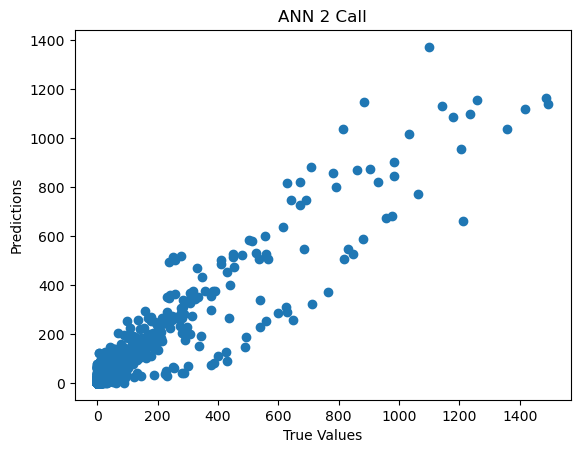

In [27]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Make predictions
y_pred = ANN2_call.predict(X_test)

# Plot the true values against the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('ANN 2 Call')
plt.show()


#### PERFORMANCE FOR PUT MODEL

In [16]:
from keras.models import load_model

# Load the model
ANN2_put = load_model('models\\ann2\\ANN2_PUT.keras')

In [28]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split


# Separate features and target
X = ann2_put_data[[
        'strike',
        'stock', 
        'tau',
        'sigma',
        'dividendRate',
        'dividendYield',
        'fiveYearAvgDividendYield',
          ]]
y = ann2_put_data['price']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [14]:
X_test

,strike,stock,tau,sigma,dividendRate,dividendYield,fiveYearAvgDividendYield
49372,35.0,44.32,0.095238,0.410373,0.00,0.0000,0.00
765,138.0,147.68,0.003968,0.277048,0.00,0.0000,0.00
55721,40.0,61.72,0.452381,0.447565,0.00,0.0000,0.00
29949,70.0,128.69,0.027778,0.630169,0.00,0.0000,0.00
59768,20.0,15.91,0.250000,0.807918,0.00,0.0000,0.00
...,...,...,...,...,...,...,...
19362,140.0,141.38,0.087302,0.282565,0.97,0.0066,0.00
35822,67.5,78.00,0.079365,0.286145,1.00,0.0128,6.39
22724,180.0,182.55,0.071429,0.206939,6.80,0.0378,3.35
48638,67.5,67.65,0.079365,0.444620,0.00,0.0000,0.00


In [17]:
X_test['ann2'] = ANN2_put.predict(X_test)
X_test

215/215 [==============================] - 1s 2ms/step


,strike,stock,tau,sigma,dividendRate,dividendYield,fiveYearAvgDividendYield,ann2
49372,35.0,44.32,0.095238,0.410373,0.00,0.0000,0.00,0.737705
765,138.0,147.68,0.003968,0.277048,0.00,0.0000,0.00,0.737705
55721,40.0,61.72,0.452381,0.447565,0.00,0.0000,0.00,0.737705
29949,70.0,128.69,0.027778,0.630169,0.00,0.0000,0.00,0.737705
59768,20.0,15.91,0.250000,0.807918,0.00,0.0000,0.00,3.317539
...,...,...,...,...,...,...,...,...
19362,140.0,141.38,0.087302,0.282565,0.97,0.0066,0.00,0.747041
35822,67.5,78.00,0.079365,0.286145,1.00,0.0128,6.39,0.737705
22724,180.0,182.55,0.071429,0.206939,6.80,0.0378,3.35,0.737705
48638,67.5,67.65,0.079365,0.444620,0.00,0.0000,0.00,0.863194


In [18]:
X_test['price'] = y_test
X_test

,strike,stock,tau,sigma,dividendRate,dividendYield,fiveYearAvgDividendYield,ann2,price
49372,35.0,44.32,0.095238,0.410373,0.00,0.0000,0.00,0.737705,0.15
765,138.0,147.68,0.003968,0.277048,0.00,0.0000,0.00,0.737705,0.02
55721,40.0,61.72,0.452381,0.447565,0.00,0.0000,0.00,0.737705,0.57
29949,70.0,128.69,0.027778,0.630169,0.00,0.0000,0.00,0.737705,0.03
59768,20.0,15.91,0.250000,0.807918,0.00,0.0000,0.00,3.317539,6.00
...,...,...,...,...,...,...,...,...,...
19362,140.0,141.38,0.087302,0.282565,0.97,0.0066,0.00,0.747041,1.47
35822,67.5,78.00,0.079365,0.286145,1.00,0.0128,6.39,0.737705,0.08
22724,180.0,182.55,0.071429,0.206939,6.80,0.0378,3.35,0.737705,1.75
48638,67.5,67.65,0.079365,0.444620,0.00,0.0000,0.00,0.863194,0.25


In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate Mean Squared Error (MSE)
ANN2_put_mse = mean_squared_error(X_test['price'], X_test['ann2'])

# Calculate Root Mean Squared Error (RMSE)
ANN2_put_rmse = np.sqrt(ANN2_put_mse)

# Calculate Mean Absolute Error (MAE)
ANN2_put_mae = mean_absolute_error(X_test['price'], X_test['ann2'])

# Calculate Mean Absolute Percentage Error (MAPE)
ANN2_put_mape = np.mean(np.abs((X_test['price'] - X_test['ann2']) / X_test['price'])) * 100

# Calculate R-squared
ANN2_put_r_squared = r2_score(X_test['price'], X_test['ann2'])

print("Mean Squared Error (MSE):", ANN2_put_mse)
print("Root Mean Squared Error (RMSE):", ANN2_put_rmse)
print("Mean Absolute Error (MAE):", ANN2_put_mae)
print("Mean Absolute Percentage Error (MAPE):", ANN2_put_mape)
print("R-squared:", ANN2_put_r_squared)


Mean Squared Error (MSE): 200.93475141652473
Root Mean Squared Error (RMSE): 14.175145551863823
Mean Absolute Error (MAE): 3.265570683486963
Mean Absolute Percentage Error (MAPE): 1037.0164240660754
R-squared: 0.853693993797247


215/215 [==============================] - 1s 2ms/step


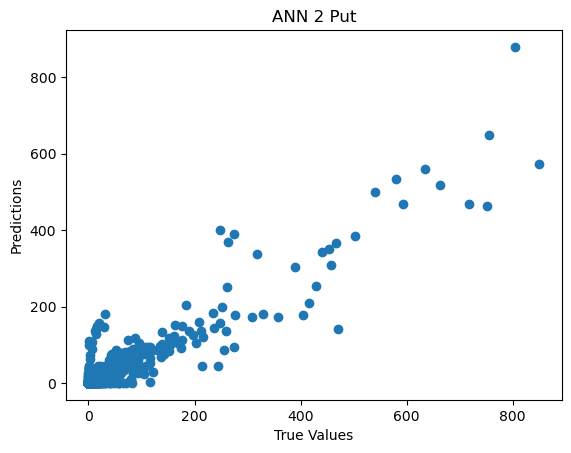

In [29]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Make predictions
y_pred = ANN2_put.predict(X_test)

# Plot the true values against the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('ANN 2 Put')
plt.show()